In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


In [126]:
df_origin = pd.read_csv("filled_scout.csv")
df = df_origin.copy()
df.head()

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
0,Audi A1,Sedans,15770.000,56013.000,2.000,Black,Metallic,5.000,5.000,Automatic,3.000,front,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.800,3.500,3.500,Yes
1,Audi A1,Sedans,14500.000,80000.000,1.000,Red,Metallic,3.000,4.000,Automatic,4.000,front,Benzine,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,141.000,Used,Cloth,Grey,1798.000,5.600,4.700,4.700,No
2,Audi A1,Sedans,14640.000,83450.000,1.000,Black,Metallic,4.000,4.000,Automatic,4.000,front,Diesel,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,85.000,Used,Cloth,Black,1598.000,3.800,3.400,3.400,No
3,Audi A1,Sedans,14500.000,73000.000,1.000,Brown,Metallic,3.000,4.000,Automatic,3.000,front,Diesel,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,66.000,Used,Cloth,Black,1422.000,3.800,3.500,3.500,No
4,Audi A1,Sedans,16790.000,16200.000,1.000,Black,Metallic,5.000,5.000,Automatic,3.000,front,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,4.100,3.800,3.800,Yes


In [122]:
df.sample(8)

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Drive chain,CO2 Emission,Gears
5820,Opel Astra,Station wagon,7380,3.000,142669.000,Diesel,Used,1.000,White,Metallic,Manual,81.000,4.500,5.700,3.900,"Air conditioning, Automatic climate control, A...","On-board computer, Radio","ABS, Central door lock, Driver-side airbag, El...","Alloy wheels, Roof rack, Trailer hitch",Cloth,Grey,VAT deductible,4.000,5.000,1598.000,4.000,front,119.000,6.000
6613,Opel Astra,Sedans,15450,1.000,19000.000,Benzine,Used,1.000,Black,Metallic,Manual,92.000,5.000,6.300,4.300,"Air conditioning, Automatic climate control, C...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Daytime running lights...",Voice Control,Cloth,Black,VAT deductible,5.000,5.000,1399.000,4.000,front,117.000,5.000
764,Audi A1,Sedans,13990,3.000,30000.000,Benzine,Used,1.000,White,Metallic,Manual,70.000,4.200,5.000,3.700,"Air conditioning, Armrest, Electrical side mir...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Central door lock, Central door lock with...","Alloy wheels, Sport package, Sport seats, Spor...",Cloth,Black,VAT undeductible,5.000,4.000,1395.000,3.000,front,97.000,5.000
10656,Opel Insignia,Sedans,17999,2.000,48500.000,Diesel,Used,2.000,Blue,Metallic,Manual,125.000,5.500,6.900,4.600,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, Radio, USB","ABS, Adaptive headlights, Central door lock wi...","Alloy wheels, Touch screen, Voice Control",Full leather,Black,VAT undeductible,5.000,5.000,1956.000,4.000,front,144.000,6.000
5454,Opel Astra,Sedans,13490,3.000,38397.000,Benzine,Used,1.000,White,Metallic,Automatic,77.000,4.200,5.000,3.700,"Air conditioning, Armrest, Cruise control, Ele...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Daytime running lights...",Touch screen,Cloth,Cloth,VAT undeductible,5.000,5.000,1399.000,3.000,front,96.000,5.000
2783,Audi A3,Station wagon,15470,3.000,89652.000,Diesel,Used,1.000,Black,Metallic,Manual,110.000,3.800,4.500,4.000,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, On...","ABS, Central door lock, Daytime running lights...","Sport package, Sport seats, Sport suspension, ...",Part leather,Black,VAT deductible,4.000,5.000,1968.000,4.000,front,101.000,6.000
848,Audi A1,Sedans,21480,1.000,4936.000,Benzine,Used,1.000,Blue,Metallic,Automatic,92.000,4.900,6.200,4.200,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Cab or rented Car, Catalytic Con...",Cloth,Grey,VAT deductible,4.000,5.000,1395.000,4.000,front,11.000,7.000
12590,Renault Clio,Sedans,8600,3.000,86000.000,Diesel,Used,1.000,Red,Metallic,Manual,55.000,3.600,4.300,3.200,"Air conditioning, Armrest, Split rear seats","Bluetooth, On-board computer, Radio","ABS, Central door lock with remote control, Dr...",Catalytic Converter,Cloth,Other,VAT undeductible,5.000,5.000,1461.000,4.000,front,95.000,5.000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14376 entries, 0 to 14375
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_model            14376 non-null  object 
 1   body_type              14376 non-null  object 
 2   price                  14376 non-null  int64  
 3   age                    14376 non-null  float64
 4   km                     14376 non-null  float64
 5   Fuel                   14376 non-null  object 
 6   Type                   14376 non-null  object 
 7   prev_owner             14376 non-null  float64
 8   Body Color             14376 non-null  object 
 9   Paint Type             14376 non-null  object 
 10  Gearing Type           14376 non-null  object 
 11  hp                     14376 non-null  float64
 12  Consumption_comb       14376 non-null  float64
 13  Consumption_city       14376 non-null  float64
 14  Consumption_country    14376 non-null  float64
 15  Co

In [124]:
df.shape

(14376, 29)

In [45]:
## df.select_dtypes(include="number")  # bunu yazarak alabiliriz ; Ama NUMERIC OLMASINA RAĞMEN KATEGORİK OLAN SÜTUNLAR VAR
                                        # NR.OF.DOORS , AGE VS

In [5]:
def grab_col_names(dataframe,categ_th=13,cardi_th=25):        # threshold:eşik
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    not : Kategorik değişkenlerin içerisine numeric görünümlü kategorik değişkenler de dahildir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    categ_cols: list
            Kategorik değişken listesi
    num_cols: list
            Numerik değişken listesi
    categ_but_cardi: list
            Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    categ_cols + num_cols + categ_but_cardi = toplam değişken sayısı
    num_but_categ; categ_cols'un içerisinde."""
    
    # categ_cols , categ_but_cardi
    categ_cols = [col for col in df.columns if  str(df[col].dtypes) in ["category","object","bool"]]
    num_but_categ = [col for col in df.columns if df[col].nunique() < categ_th  and str(df[col].dtypes) in ["int64","float64"]]
    categ_but_cardi = [col for col in df.columns if df[col].nunique() > cardi_th and  str(df[col].dtypes) in ["category","object"]]
    
    
    categ_cols =  categ_cols  +  num_but_categ
    categ_cols = [col for col in categ_cols if col not in categ_but_cardi]   ### cat_but_cardi'nin içinde olmayanları al diyoruz yani.
    
    
    
    # numeric:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_categ]
    
    
    # rapor
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categ_cols: {len(categ_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'categ_but_cardi: {len(categ_but_cardi)}')
    print(f'num_but_cat: {len(num_but_categ)}')
    
    
    return categ_cols, num_cols, categ_but_cardi
    

In [6]:
cat_cols , num_cols,categ_but_car = grab_col_names(df)

Observations: 15919
Variables: 29
categ_cols: 17
num_cols: 8
categ_but_cardi: 4
num_but_cat: 6


In [7]:
categ_but_car

['comfort_convenience', 'entertainment_media', 'Extras', 'safety_security']

In [8]:
df["comfort_convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: comfort_convenience, Length: 15919, dtype: object

In [9]:
df["entertainment_media"]

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15914    Bluetooth,Digital radio,Hands-free equipment,O...
15915    Bluetooth,Digital radio,Hands-free equipment,R...
15916    Bluetooth,Hands-free equipment,On-board comput...
15917                    Bluetooth,Digital radio,Radio,USB
15918                                                  USB
Name: entertainment_media, Length: 15919, dtype: object

In [10]:
num_cols

['price',
 'km',
 'co2_emission',
 'hp_kw',
 'displacement_cc',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country']

In [11]:
q1 = df["km"].quantile(q=0.25)
q3 = df["km"].quantile(q=0.75)
iqr = q3 - q1

In [12]:
q1

3300.0

In [13]:
q3

47000.0

In [14]:
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [15]:
low,up

(-62250.0, 112550.0)

In [16]:
df["km"].min()  ## mesela km sütunumda alt tarafta outlier olamaz bu durumda.

0.0

In [17]:
df["km"].max()  ## bu mesela bir extreme değer.

317000.0

In [18]:
## 

In [19]:
df[(df["km"] < low ) | (df["km"] > up)].sort_values(by="km")                             ## 715 tane outlier var gibi duruyor.

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
4352,Audi A3,Sedans,16690.000,112700.000,1.000,Black,Metallic,4.000,5.000,Manual,4.000,front,Diesel,107.000,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Trailer...","ABS,Central door lock,Central door lock with r...",6.000,2.000,81.000,Used,Cloth,Black,1598.000,4.000,3.600,3.600,Yes
3194,Audi A3,Sedans,14890.000,112750.000,1.000,Blue,Metallic,4.000,5.000,Manual,4.000,front,Diesel,106.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Elect...",6.000,3.000,81.000,Used,Cloth,Black,1598.000,4.000,3.600,3.600,No
10600,Opel Insignia,Sedans,15400.000,112789.000,1.000,Black,Metallic,4.000,5.000,Automatic,4.000,front,Diesel,147.000,"Air conditioning,Automatic climate control,Pow...",On-board computer,Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6.000,2.000,125.000,Employee's car,Cloth,Black,1956.000,5.600,4.500,4.500,No
11238,Opel Insignia,Station wagon,18479.000,112895.000,1.000,White,Metallic,5.000,5.000,Automatic,4.000,front,Diesel,146.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Shift paddles","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,2.000,125.000,Used,Full leather,Black,1956.000,5.500,4.200,4.200,Yes
11026,Opel Insignia,Station wagon,12980.000,112936.000,1.000,Black,Metallic,4.000,5.000,Manual,4.000,front,Diesel,135.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer","Alloy wheels,Roof rack,Sport seats,Trailer hitch","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,3.000,125.000,Used,Full leather,Grey,1956.000,5.600,4.600,4.600,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,Renault Espace,Van,14600.000,240000.000,1.000,White,Metallic,5.000,5.000,Automatic,4.000,front,Diesel,120.000,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.000,2.000,118.000,Used,Full leather,Black,1598.000,4.600,4.400,4.400,No
6224,Opel Astra,Station wagon,9800.000,248000.000,1.000,White,Metallic,4.000,4.000,Manual,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.000,3.000,81.000,Used,Cloth,Black,1686.000,4.500,4.000,4.000,No
5712,Opel Astra,Station wagon,6000.000,260000.000,1.000,Silver,Metallic,5.000,5.000,Automatic,4.000,front,Diesel,119.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,3.000,100.000,Used,Cloth,Black,1598.000,4.500,3.800,3.800,No
3003,Audi A3,Sedans,14980.000,291800.000,1.000,Blue,Metallic,4.000,5.000,Manual,4.000,4WD,Diesel,125.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,3.000,110.000,Used,Cloth,Black,1968.000,4.700,4.100,4.100,No


In [20]:
df[(df["km"] < low ) | (df["km"] > up)].index
## ileride bunu kullanabiliriz .kulaklarından tuttuk getirdik.

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [21]:
df[(df["km"] < low ) | (df["km"] > up)].any(axis=None)

## any() -----> bu sorgu extreme değerleri getirecek bize herhangi bir extreme değer var mı diyoruz ; 
## axis = None ---> satır veya sütuna değil de hepsine bakmak istiyorum.
## bool döndüğüne dikkat edelim.

True

In [22]:
## yani ben ileride diyeceğim ki bu bana True döndürürse şunları yap False döndürürse şunları yap.

In [23]:
df[~((df["km"] < low ) | (df["km"] > up))]    ## extreme olmayanlar

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
0,Audi A1,Sedans,15770.000,56013.000,2.000,Black,Metallic,5.000,5.000,Automatic,3.000,front,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.800,3.500,3.500,Yes
1,Audi A1,Sedans,14500.000,80000.000,1.000,Red,Metallic,3.000,4.000,Automatic,4.000,front,Benzine,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,141.000,Used,Cloth,Grey,1798.000,5.600,4.700,4.700,No
2,Audi A1,Sedans,14640.000,83450.000,1.000,Black,Metallic,4.000,4.000,Automatic,4.000,front,Diesel,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,85.000,Used,Cloth,Black,1598.000,3.800,3.400,3.400,No
3,Audi A1,Sedans,14500.000,73000.000,1.000,Brown,Metallic,3.000,4.000,Automatic,3.000,front,Diesel,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,66.000,Used,Cloth,Black,1422.000,3.800,3.500,3.500,No
4,Audi A1,Sedans,16790.000,16200.000,1.000,Black,Metallic,5.000,5.000,Automatic,3.000,front,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,4.100,3.800,3.800,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Van,39950.000,1434.036,1.000,Grey,Metallic,5.000,5.000,Automatic,4.000,front,Diesel,139.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6.000,0.000,147.000,New,Full leather,Black,1997.000,5.300,4.700,4.700,Yes
15915,Renault Espace,Van,39885.000,9900.000,1.000,Grey,Metallic,5.000,5.000,Automatic,4.000,front,Benzine,168.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,0.000,165.000,Used,Cloth,Black,1798.000,7.400,6.300,6.300,Yes
15916,Renault Espace,Van,39875.000,15.000,1.000,White,Metallic,5.000,7.000,Automatic,4.000,front,Diesel,139.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,0.000,146.000,Pre-registered,Full leather,Black,1997.000,5.300,4.700,4.700,Yes
15917,Renault Espace,Van,39700.000,10.000,1.000,Grey,Metallic,5.000,7.000,Automatic,4.000,front,Diesel,139.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6.000,0.000,147.000,Pre-registered,Part leather,Black,1997.000,5.300,4.700,4.700,Yes


In [24]:
df[~((df["km"] < low ) | (df["km"] > up))].any(axis=None)

True

In [25]:
df[(df["km"] < low)].any(axis=None) 

False

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [27]:
outlier_thresholds(df,"km")

(-62250.0, 112550.0)

In [28]:
outlier_thresholds(df,"km",q1=0.05,q3=0.95)

(-164839.99999999977, 274759.99999999965)

In [29]:
df["km"].median()

20880.0

In [30]:
low,up = outlier_thresholds(df,"km")

In [31]:
df[(df["km"] < low ) | (df["km"] > up)].head(3)

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
25,Audi A1,Sedans,8999.000,115000.000,1.000,White,Metallic,5.000,4.000,Manual,3.000,front,Benzine,97.000,"Air conditioning,Electrical side mirrors,Leath...","Radio,Sound system","Alloy wheels,Winter tyres","ABS,Central door lock,Central door lock with r...",5.000,3.000,70.000,Used,Cloth,Black,999.000,4.200,3.700,3.700,No
34,Audi A1,Sedans,11900.000,126000.000,1.000,White,Metallic,5.000,4.000,Manual,3.000,front,Diesel,97.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.700,3.400,3.400,No
61,Audi A1,Compact,9950.000,118500.000,1.000,Black,Metallic,3.000,4.000,Manual,3.000,front,Benzine,102.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Central door lock with r...",5.000,3.000,70.000,Used,Cloth,Black,999.000,4.400,3.900,3.900,Yes


In [32]:
df[(df["km"] < low ) | (df["km"] > up)].index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [33]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

#### DİKKAT : outlier_thresholds FONKSİYONUNUN q1 ve q3 argümanlarını biçimlendirmek istersek eğer onları da check_outlier() fonksiyonuna parametre olarak girmemiz GEREKİR.

In [34]:
check_outlier(df, "km")

True

In [35]:
### check_outlier FONKSİYONUNUN BOOL RETURN  ETTİĞİNİ GÖZDEN KAÇIRMAYALIM.BUNU BİR KOD AKIŞI ESNASINDA KULLANABİLİRİZ

In [36]:
num_cols

['price',
 'km',
 'co2_emission',
 'hp_kw',
 'displacement_cc',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country']

In [37]:
# num_cols = [col for col in num_cols if col not in "unwanted feature"]

In [38]:
for col in num_cols:
    print(col,check_outlier(df,col))

price True
km True
co2_emission True
hp_kw True
displacement_cc True
Consumption_comb True
Consumption_city True
Consumption_country True


In [39]:
## bütün  numeric sütunlarımda extreme değer varmış.

In [99]:
def grab_outliers(dataframe, col_name, index=False,q1 = 0.25,q3=0.75):
    low, up = outlier_thresholds(dataframe, col_name)
                                          
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        ## EĞER AYKIRI DEĞER 10'DAN BÜYÜKSE BİZE HEAD'İ VER
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

### grab_outliers bizim için bir analiz fonksiyonu ama index=True yaparak bize indexleri de return ettirebiliriz.

In [41]:
grab_outliers(df, "km")

   make_model body_type     price         km  prev_owner body_color  \
25    Audi A1    Sedans  8999.000 115000.000       1.000      White   
34    Audi A1    Sedans 11900.000 126000.000       1.000      White   
61    Audi A1   Compact  9950.000 118500.000       1.000      Black   
63    Audi A1    Sedans 10000.000 192000.000       1.000      Black   
64    Audi A1   Compact 10490.000 130000.000       1.000      White   

   paint_type  number_of_doors  number_of_seats gearing_type  Cylinders  \
25   Metallic            5.000            4.000       Manual      3.000   
34   Metallic            5.000            4.000       Manual      3.000   
61   Metallic            3.000            4.000       Manual      3.000   
63   Metallic            5.000            4.000       Manual      4.000   
64   Metallic            4.000            4.000       Manual      3.000   

   drive_chain     Fuel  co2_emission  \
25       front  Benzine        97.000   
34       front   Diesel        97.000   

In [42]:
grab_outliers(df, "km",index=True)

   make_model body_type     price         km  prev_owner body_color  \
25    Audi A1    Sedans  8999.000 115000.000       1.000      White   
34    Audi A1    Sedans 11900.000 126000.000       1.000      White   
61    Audi A1   Compact  9950.000 118500.000       1.000      Black   
63    Audi A1    Sedans 10000.000 192000.000       1.000      Black   
64    Audi A1   Compact 10490.000 130000.000       1.000      White   

   paint_type  number_of_doors  number_of_seats gearing_type  Cylinders  \
25   Metallic            5.000            4.000       Manual      3.000   
34   Metallic            5.000            4.000       Manual      3.000   
61   Metallic            3.000            4.000       Manual      3.000   
63   Metallic            5.000            4.000       Manual      4.000   
64   Metallic            4.000            4.000       Manual      3.000   

   drive_chain     Fuel  co2_emission  \
25       front  Benzine        97.000   
34       front   Diesel        97.000   

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

In [43]:
km_index = grab_outliers(df, "km",index=True)

   make_model body_type     price         km  prev_owner body_color  \
25    Audi A1    Sedans  8999.000 115000.000       1.000      White   
34    Audi A1    Sedans 11900.000 126000.000       1.000      White   
61    Audi A1   Compact  9950.000 118500.000       1.000      Black   
63    Audi A1    Sedans 10000.000 192000.000       1.000      Black   
64    Audi A1   Compact 10490.000 130000.000       1.000      White   

   paint_type  number_of_doors  number_of_seats gearing_type  Cylinders  \
25   Metallic            5.000            4.000       Manual      3.000   
34   Metallic            5.000            4.000       Manual      3.000   
61   Metallic            3.000            4.000       Manual      3.000   
63   Metallic            5.000            4.000       Manual      4.000   
64   Metallic            4.000            4.000       Manual      3.000   

   drive_chain     Fuel  co2_emission  \
25       front  Benzine        97.000   
34       front   Diesel        97.000   

In [44]:
km_index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=715)

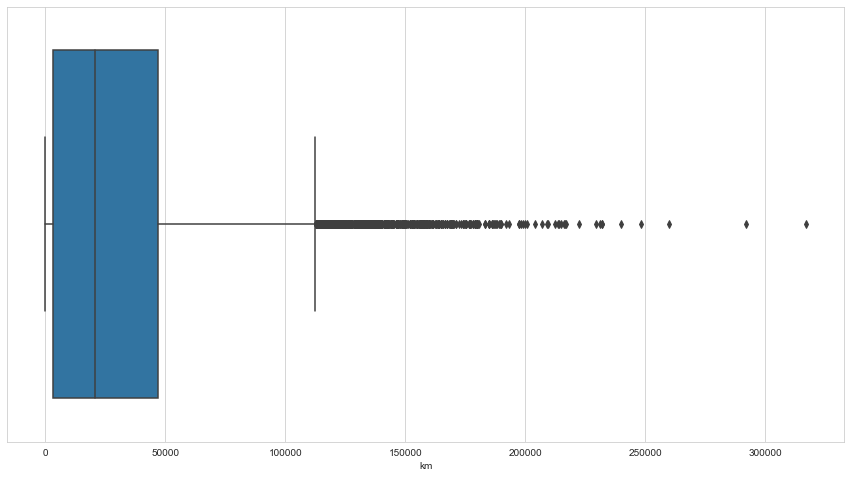

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["km"])
plt.show()

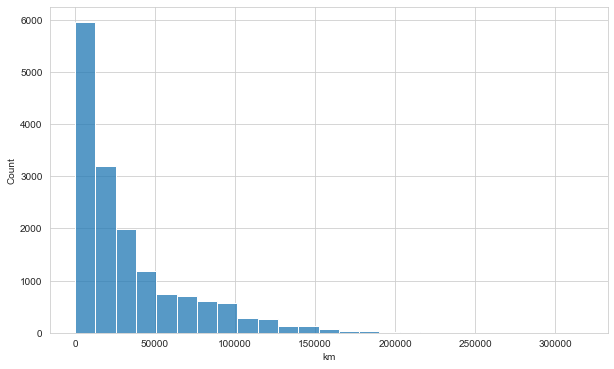

In [47]:
plt.figure()
sns.histplot(df["km"], bins = 25,kde = False);

#### evet benim feature'mda extreme değerler var outlier demiyoruz daha ! bu exteme değerler outlier olabilir mi onu kurcalayacağız?

In [48]:
df.loc[km_index]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
25,Audi A1,Sedans,8999.000,115000.000,1.000,White,Metallic,5.000,4.000,Manual,3.000,front,Benzine,97.000,"Air conditioning,Electrical side mirrors,Leath...","Radio,Sound system","Alloy wheels,Winter tyres","ABS,Central door lock,Central door lock with r...",5.000,3.000,70.000,Used,Cloth,Black,999.000,4.200,3.700,3.700,No
34,Audi A1,Sedans,11900.000,126000.000,1.000,White,Metallic,5.000,4.000,Manual,3.000,front,Diesel,97.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Alarm system,Central door lock,Daytime run...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.700,3.400,3.400,No
61,Audi A1,Compact,9950.000,118500.000,1.000,Black,Metallic,3.000,4.000,Manual,3.000,front,Benzine,102.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Central door lock with r...",5.000,3.000,70.000,Used,Cloth,Black,999.000,4.400,3.900,3.900,Yes
63,Audi A1,Sedans,10000.000,192000.000,1.000,Black,Metallic,5.000,4.000,Manual,4.000,front,Diesel,102.000,"Air conditioning,Armrest,Electrical side mirro...","MP3,Radio",Alloy wheels,"ABS,Central door lock,Central door lock with r...",5.000,3.000,85.000,Used,Cloth,Black,1598.000,3.900,3.400,3.400,Yes
64,Audi A1,Compact,10490.000,130000.000,1.000,White,Metallic,4.000,4.000,Manual,3.000,front,Diesel,102.000,"Air conditioning,Electrical side mirrors,Hill ...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.900,3.600,3.600,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,Renault Espace,Van,16900.000,122000.000,1.000,Black,Metallic,5.000,5.000,Semi-automatic,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r...",6.000,3.000,118.000,Used,Full leather,Black,1598.000,4.700,4.400,4.400,No
15412,Renault Espace,Van,19900.000,130000.000,1.000,Violet,Metallic,5.000,5.000,Semi-automatic,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,Radio,Sound sys...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,3.000,118.000,Used,Full leather,Brown,1598.000,4.700,4.400,4.400,No
15413,Renault Espace,Transporter,20900.000,140000.000,1.000,Black,Metallic,5.000,5.000,Semi-automatic,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Handicapped enabled,Shift paddles...","ABS,Alarm system,Electronic stability control,...",6.000,3.000,118.000,Used,Full leather,Brown,1598.000,4.700,4.400,4.400,No
15416,Renault Espace,Van,19800.000,130000.000,1.000,Beige,Metallic,5.000,7.000,Semi-automatic,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Ski bag,Touch screen,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,118.000,Used,Part leather,Grey,1598.000,4.700,4.400,4.400,No


In [76]:
# km -------> log'u alınabilir belki ?

In [77]:
df.loc[km_index,["age","price","Type_"]]

,age,price,Type_
25,3.000,8999.000,Used
34,3.000,11900.000,Used
61,3.000,9950.000,Used
63,3.000,10000.000,Used
64,3.000,10490.000,Used
...,...,...,...
15386,3.000,16900.000,Used
15412,3.000,19900.000,Used
15413,3.000,20900.000,Used
15416,3.000,19800.000,Used


In [79]:
## mesela age'i 0 olanların km yanlış girilmiş olabilir !!!
# mesela abartarak söylersek ; her gün 150 km yapsa bir insan  1 yılda max 55k km yapar.

In [83]:
df.loc[km_index,["age","price","Type_","km","make_model"]].sort_values(by="age")

,age,price,Type_,km,make_model
2901,0.000,15500.000,Used,127022.000,Audi A3
14592,1.000,10450.000,Used,113392.000,Renault Clio
4312,1.000,17500.000,Used,136000.000,Audi A3
4377,2.000,16900.000,Used,115000.000,Audi A3
4388,2.000,19797.000,Used,114550.000,Audi A3
...,...,...,...,...,...
6001,3.000,11890.000,Used,133590.000,Opel Astra
6021,3.000,12490.000,Used,142684.000,Opel Astra
6033,3.000,11480.000,Used,124349.000,Opel Astra
6038,3.000,11250.000,Used,139000.000,Opel Astra


In [89]:
df.loc[(df["age"]== 0) & (df["make_model"] == "Audi A3"),["km","price"]].sort_values(by="price")

,km,price
2901,127022.000,15500.000
4031,82400.000,17990.000
4227,1.000,18820.000
4198,2499.125,18980.000
4045,10.000,19078.000
...,...,...
3613,7.000,38725.000
3591,7.000,39575.000
3607,750.000,41495.000
3590,700.000,62900.000


In [90]:
num_cols

['price',
 'km',
 'co2_emission',
 'hp_kw',
 'displacement_cc',
 'Consumption_comb',
 'Consumption_city',
 'Consumption_country']

### displacement_cc 

In [107]:
df["displacement_cc"]

0       1422.000
1       1798.000
2       1598.000
3       1422.000
4       1422.000
          ...   
15914   1997.000
15915   1798.000
15916   1997.000
15917   1997.000
15918   1798.000
Name: displacement_cc, Length: 15919, dtype: float64

In [112]:
df["displacement_cc"].sort_values()

12849       1.000
12768       1.000
12750       1.000
12670       1.000
12604       1.000
           ...   
3602     2480.000
3649     2480.000
10771    2967.000
7169    15898.000
10932   16000.000
Name: displacement_cc, Length: 15919, dtype: float64

In [108]:
outlier_thresholds(df,"displacement_cc")

(675.5, 2151.5)

In [111]:
df["displacement_cc"].min()              # belki bu 1000 cc olabilir adam yanlış anlamş olabilir atmaktansa düzeltelim.

1.0

In [110]:
df["displacement_cc"].max()

16000.0

<AxesSubplot:xlabel='displacement_cc'>

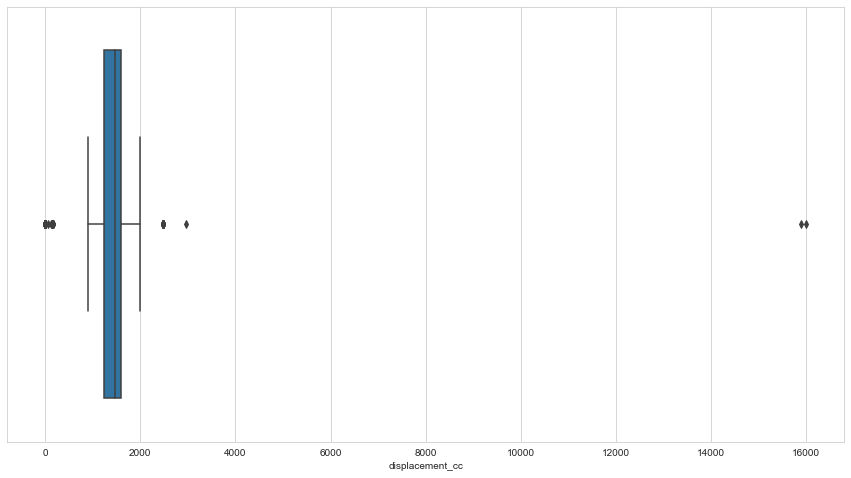

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["displacement_cc"])

In [104]:
displacement_cc_index =   grab_outliers(df,"displacement_cc",index=True)

     make_model      body_type     price        km  prev_owner body_color  \
3587    Audi A3         Sedans 64900.000 35000.000       1.000       Grey   
3590    Audi A3         Sedans 62900.000   700.000       1.000       Grey   
3592    Audi A3         Sedans 56900.000  5200.000       1.000       Grey   
3593    Audi A3         Sedans 58500.000 10000.000       1.000      White   
3595    Audi A3  Station wagon 63900.000    10.000       1.000      Black   

     paint_type  number_of_doors  number_of_seats    gearing_type  Cylinders  \
3587   Metallic            5.000            5.000  Semi-automatic      5.000   
3590   Metallic            5.000            5.000  Semi-automatic      5.000   
3592   Metallic            5.000            5.000  Semi-automatic      5.000   
3593   Metallic            5.000            5.000  Semi-automatic      5.000   
3595   Metallic            5.000            5.000  Semi-automatic      5.000   

     drive_chain     Fuel  co2_emission  \
3587         

In [114]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [117]:
df.loc[displacement_cc_index,["price","make_model","body_type","displacement_cc","age"]].sort_values(by = ["displacement_cc"])

,price,make_model,body_type,displacement_cc,age
12604,28990.000,Opel Insignia,Station wagon,1.000,0.000
12467,37490.000,Opel Insignia,Station wagon,1.000,0.000
12473,34490.000,Opel Insignia,Station wagon,1.000,0.000
12484,33990.000,Opel Insignia,Sedans,1.000,0.000
12499,36990.000,Opel Insignia,Station wagon,1.000,0.000
12501,36990.000,Opel Insignia,Station wagon,1.000,0.000
12554,33590.000,Opel Insignia,Station wagon,1.000,0.000
12848,33990.000,Opel Insignia,Station wagon,1.000,0.000
12670,29990.000,Opel Insignia,Station wagon,1.000,0.000
12750,41490.000,Opel Insignia,Sedans,1.000,0.000


In [113]:
## opel insignia stagon vagon mesela 1.4 motormuş.     1.4 Motor == 1.400 cc 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   body_color           15919 non-null  object 
 6   paint_type           15919 non-null  object 
 7   number_of_doors      15919 non-null  float64
 8   number_of_seats      15919 non-null  float64
 9   gearing_type         15919 non-null  object 
 10  Cylinders            15919 non-null  float64
 11  drive_chain          15919 non-null  object 
 12  Fuel                 15919 non-null  object 
 13  co2_emission         15919 non-null  float64
 14  comfort_convenience  15919 non-null  object 
 15  entertainment_media  15919 non-null 

### datayı temizlerken farkettiğimiz bazılarına müdahele ettiğimiz bazılarına ise dokunmadığımız değerleri düzeltelim:

In [54]:
df.loc[df["number_of_doors"]==1]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
13782,Renault Clio,Compact,8500.000,41493.000,1.000,White,Metallic,1.000,5.000,Manual,4.000,front,Diesel,85.000,"Air conditioning,Cruise control,Hill Holder,Mu...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,55.000,Used,Cloth,Black,1461.000,5.000,4.400,4.400,No


In [56]:
df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "number_of_doors"].mode()[0]

5.0

In [57]:
df.loc[df["number_of_doors"]==1] = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "number_of_doors"].mode()[0]

In [60]:
df[df.number_of_doors==2]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
26,Audi A1,Compact,11444.000,84029.000,1.000,Blue,Metallic,2.000,4.000,Manual,3.000,front,Benzine,97.000,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,70.000,Used,Cloth,Black,999.000,4.200,3.700,3.700,Yes
44,Audi A1,Sedans,11490.000,44120.000,1.000,Black,Metallic,2.000,5.000,Manual,3.000,front,Diesel,94.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,66.000,Used,Cloth,Black,1422.000,3.600,3.300,3.300,No
48,Audi A1,Compact,11490.000,58000.000,2.000,Black,Metallic,2.000,4.000,Manual,3.000,front,Benzine,102.000,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,CD player","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",5.000,3.000,60.000,Used,Part leather,Black,999.000,4.400,3.900,3.900,Yes
55,Audi A1,Compact,10999.000,69500.000,1.000,Black,Metallic,2.000,4.000,Manual,3.000,front,Benzine,102.000,"Air conditioning,Armrest,Automatic climate con...",CD player,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,2.000,70.000,Used,Cloth,Black,999.000,4.400,3.900,3.900,No
56,Audi A1,Compact,10900.000,43500.000,1.000,White,Metallic,2.000,4.000,Manual,3.000,front,Benzine,97.000,"Air conditioning,Electrical side mirrors,Power...","CD player,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,3.000,60.000,Used,Cloth,Black,999.000,4.200,3.700,3.700,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10304,Opel Corsa,Compact,10499.000,325.000,1.000,Red,Metallic,2.000,4.000,Manual,4.000,front,Benzine,126.000,"Air conditioning,Electrical side mirrors,Power...",Radio,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,51.000,New,Cloth,Black,1229.000,5.400,4.600,4.600,Yes
10314,Opel Corsa,Compact,9990.000,100.000,1.000,Blue,Metallic,2.000,5.000,Manual,4.000,front,Benzine,126.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,51.000,New,Cloth,Black,1229.000,5.400,4.600,4.600,Yes
10380,Opel Corsa,Compact,11290.000,12.000,1.000,Red,Uni/basic,2.000,5.000,Manual,4.000,front,Benzine,126.000,"Air conditioning,Electrical side mirrors,Power...","Bluetooth,Hands-free equipment,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,51.000,Pre-registered,Cloth,Black,1229.000,5.400,4.600,4.600,Yes
10413,Opel Corsa,Compact,11190.000,10.000,1.000,Blue,Metallic,2.000,5.000,Manual,4.000,front,Benzine,126.000,"Air conditioning,Electrical side mirrors,Hill ...","Radio,Sound system",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.000,0.000,51.000,Pre-registered,Cloth,Black,1229.000,5.400,4.600,4.600,Yes


In [61]:
df.loc[df.number_of_doors==2,"make_model"].value_counts()

Audi A1       99
Opel Corsa    93
Audi A3       27
Name: make_model, dtype: int64

In [63]:
df[df.number_of_doors==7]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
15202,Renault Espace,Van,21600.000,78000.000,1.000,Brown,Metallic,7.000,5.000,Automatic,4.000,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,3.000,118.000,Used,Full leather,Brown,1598.000,4.600,4.400,4.400,No


In [65]:
df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "number_of_doors"].mode()[0]

5.0

In [67]:
df.loc[df.number_of_doors==7,"number_of_doors"] 

15202   7.000
Name: number_of_doors, dtype: float64

In [68]:
df.loc[df.number_of_doors==7,"number_of_doors"] = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "number_of_doors"].mode()[0]

In [69]:
df["number_of_doors"].value_counts()

5.000    11790
4.000     3078
3.000      832
2.000      219
Name: number_of_doors, dtype: int64

In [70]:
df["number_of_seats"].value_counts()

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: number_of_seats, dtype: int64

In [71]:
df[df["number_of_seats"]==3]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
1636,Audi A1,Compact,23090.000,9821.000,1.000,Black,Metallic,2.000,3.000,Automatic,4.000,front,Benzine,134.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,1.000,141.000,Used,Part leather,Black,1798.000,5.800,4.900,4.900,Yes


In [72]:
df[df["number_of_seats"]==6]

,make_model,body_type,price,km,prev_owner,body_color,paint_type,number_of_doors,number_of_seats,gearing_type,Cylinders,drive_chain,Fuel,co2_emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,age,hp_kw,Type_,upholstery_type,upholstery_color,displacement_cc,Consumption_comb,Consumption_city,Consumption_country,insp_new
582,Audi A1,Compact,13500.000,100000.000,1.000,White,Metallic,5.000,6.000,Manual,4.000,front,Benzine,105.000,Air conditioning,On-board computer,Alloy wheels,ABS,5.000,2.000,70.000,Used,Cloth,Black,1000.000,4.400,3.900,3.900,No
15890,Renault Espace,Station wagon,42490.000,23812.524,1.000,Black,Metallic,5.000,6.000,Automatic,4.000,front,Diesel,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,1.000,147.000,New,Cloth,Other,1997.000,5.700,5.300,5.300,Yes


In [73]:
# ?????